# Model analysis to inspect the generated model files

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import struct

In [ ]:
def read_uint8 (f) :
    return ord(f.read(1))

def read_int (f) :
    return int(struct.unpack("i", f.read(4))[0])

def read_double (f) :
    return float(struct.unpack("d", f.read(8))[0])

def read_model (path) :
    if os.path.isfile(path) == False :
        print(f"[ERROR] Path {path} does not exist or is not a file!")
        return []
    
    with open(path, "rb") as f :
        
        num_layers = read_uint8 (f)
        
        layers = []
        
        for layerIndex in range(num_layers) :
            
            layer = {
                "input_dim" : - 1,
                "output_dim" : -1,
                "activation_function" : -1,
                "weights": [],
                "biases" : []
            }
            
            layer["input_dim"] = read_int(f)
            layer["output_dim"] = read_int(f)
            
            layer["activation_function"] = read_int (f)
                        
            for _ in range(layer["input_dim"] * layer["output_dim"]) :
                layer["weights"].append(read_double(f))
                
            for _ in range(layer["output_dim"]) :
                layer["biases"].append(read_double(f))
            
            layer["weights"] = np.array(layer["weights"], dtype=np.float64)
            layer["weights"] = np.reshape(layer["weights"], (layer["output_dim"], layer["input_dim"]))
            
            layer["biases"] = np.array(layer["biases"], dtype=np.float64)
            
            layers.append(layer)
            
    return layers
    

In [12]:
layers = read_model("../models/gigabeast.model2")

## plot histograms

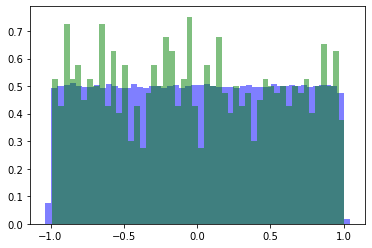

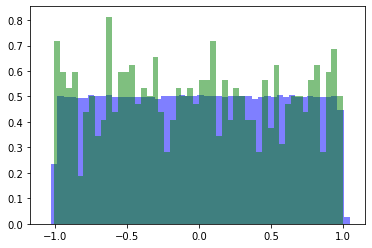

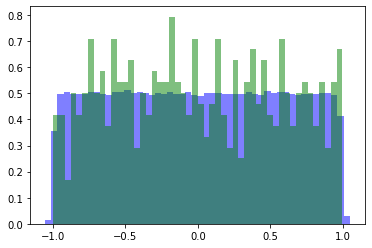

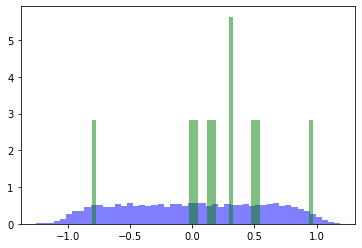

In [13]:
for layer in layers :
    plt.hist(layer["weights"].reshape(-1), bins = 50, histtype="bar", color = "blue", density= True, alpha = 0.5)
    plt.hist(layer["biases"], bins = 50, histtype="bar", color = "green", density= True, alpha = 0.5)
    plt.show()

### hist of weights for every 10 neuron in every layer

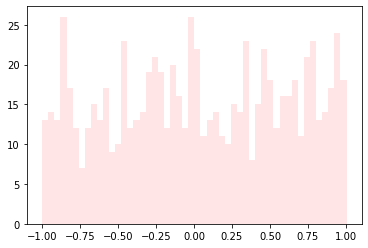

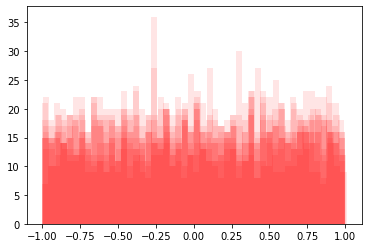

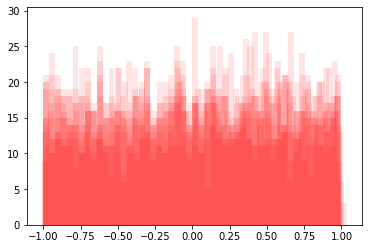

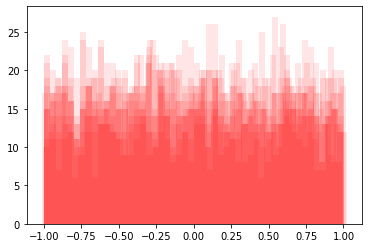

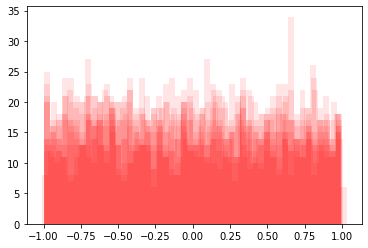

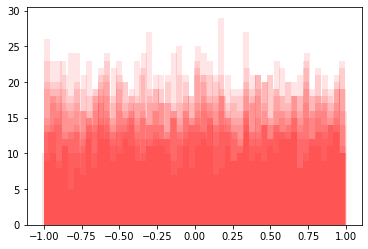

KeyboardInterrupt: 

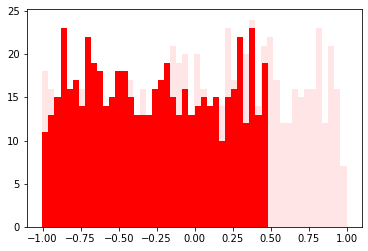

In [14]:
for layer in layers :
    for n in range(layer["output_dim"]) :
        plt.hist(layer["weights"][n], bins = 50, histtype="bar", color = "red", alpha = 0.1)
        if n % 10 == 9 :
            plt.show()
    